<a href="https://colab.research.google.com/github/Jessie-Willow/Generic-templates-for-lab-anal-JW/blob/main/Stirling_engine_part_1_(JW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import some useful modules
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optimize
import scipy.stats as stats
import scipy.odr as odr
#titles and labels your plots and residuals
xtitle="x (units)"
ytitle="y (units)"
#data
def average_error(a_err):
  return(np.sum(a_err**2)**0.5)
precis=(0.1)
V8=()
V8_err=np.ones*precis
V10=()
V10_err=np.ones*precis
V12=()
V12_err=np.ones*precis
F8=()
F8_err=np.ones/30
F10=()
F10_err=np.ones/30
F12=()
F12_err=np.ones/30
x=(np.average(V8),np.average(V10),np.average(V12))
x_err=(average_error(V8_err),average_error(V10_err),average_error(V12_err))
y=()
y_err=()
#assigns your data to arrays, and makes them a little random for the perfect fake data.
#make sure to remove the numpy random code before using this for actual data!
x=np.array(x)+(np.random.normal(0,x_err,10))
x_err=np.array(x_err)
y=np.array(y)+(np.random.normal(0,y_err,10))
y_err=np.array(y_err)

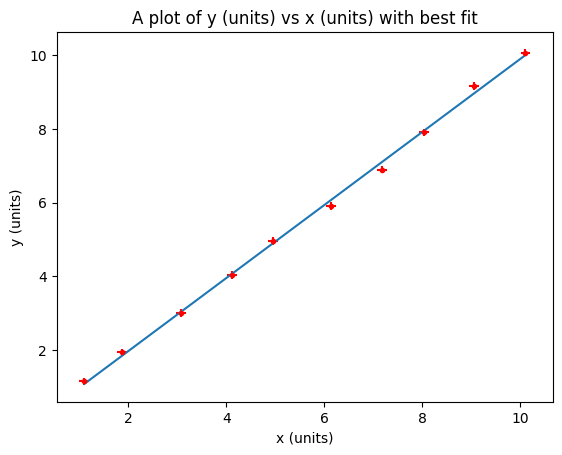

In [ ]:
#defines a straight line function (used for residuals)
def straight_line(x, m, c):
    y = m * x + c
    return y


dof = len(x) - 2
#performs a versing of Deming regression (very complicated dont ask)
mydata = odr.Data(x, y, wd=1/x_err, we=1/y_err)
myodr = odr.ODR(mydata, model=odr.unilinear)
myoutput = myodr.run()
m,c = myoutput.beta
#assigns your fit paramaters to m,c and their errors.
y_fit = straight_line(x, m, c)
m_err,c_err=(myoutput.sd_beta)
#plotting!
plt.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='r.')
plt.plot(x, y_fit, marker=None)
plt.ylabel(ytitle)
plt.xlabel(xtitle)
plt.title("A plot of "+ ytitle +" vs " +xtitle+ " with best fit")
plt.show()

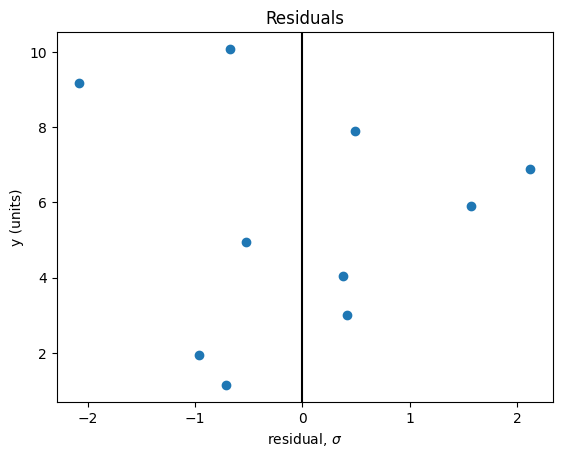

In [ ]:
#defines the invserse linear funtion for the x residuals
def inversestr(y,m,c):
  return(y/m-c)
x_fit = inversestr(y, m, c)
residuals = x - x_fit
chi_squarex = np.sum(residuals**2/x_err**2)
plt.scatter(residuals/x_err,y)
plt.axvline(x=0, color='black')
plt.ylabel(ytitle)
plt.xlabel('residual, $\sigma$')
plt.title('Residuals')
plt.show()

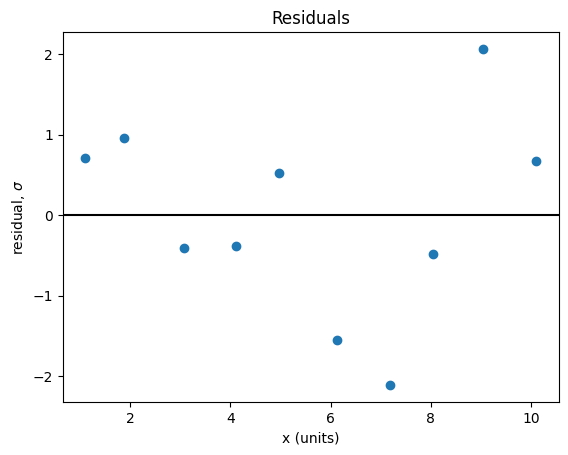

In [ ]:
#uses the nroaml straight line for the y residuals
yfit=straight_line(x,m,c)
residuals = y - yfit
chi_squarey = np.sum(residuals**2/y_err**2)
plt.scatter(x, residuals/y_err)
plt.axhline(y=0, color='black')
plt.ylabel('residual, $\sigma$')
plt.xlabel(xtitle)
plt.title('Residuals')
plt.show()

In [ ]:
#prints the plot values and errors
print('The obtained value for the gradient m is:\n')
print(f'{m:.3} +/- {m_err:.2} units')
print('\nThe obtained value for the y-intercept c is:\n')
print(f'{c:.3} +/- {c_err:.2} units')
#prints the fit analysis including chi squared and p value
#chi sqaured is divided by two due to the errors on x and y being accounted for in the fit. this has been shown experimentall to produce the correct p values
print(f'The fit yielded \nchi2 = {chi_squarey:.3} with {dof} degrees of freedom')
print(f'giving a reduced chi2 of {chi_squarey/(dof*2):.3} for y')
print(f'giving a reduced chi2 of {chi_squarex/(dof*2):.3} for x')
chi2 = stats.chi2
p_valuey = chi2.sf(chi_squarey/2, dof)
p_valuex = chi2.sf(chi_squarex/2, dof)
print(f'P-value(y) = {p_valuey:.2}')
print(f'P-value(x) = {p_valuex:.2}')

The obtained value for the gradient m is:

0.992 +/- 0.014 units

The obtained value for the y-intercept c is:

-0.012 +/- 0.09 units
The fit yielded 
chi2 = 13.8 with 8 degrees of freedom
giving a reduced chi2 of 0.863 for y
giving a reduced chi2 of 0.877 for x
P-value(y) = 0.55
P-value(x) = 0.53
